# Radial Distribution Function

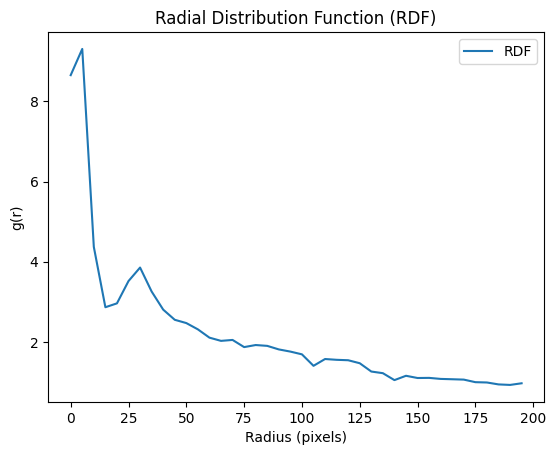

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.spatial import distance_matrix

# Load the image in grayscale
image_path = '/workspaces/Python_Physics/Images/PDVB Butanol 4% wt to vol (2).jpeg'  # Update with your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply binary threshold to highlight particles
_, thresholded_img = cv2.threshold(image, 100, 255, cv2.THRESH_BINARY)

# Find contours in the thresholded image
contours, _ = cv2.findContours(thresholded_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Extract the center of each particle (contour)
particles = []
for contour in contours:
    M = cv2.moments(contour)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        particles.append([cX, cY])

particles = np.array(particles)

# Function to compute RDF
def radial_distribution_function(particles, max_radius, bin_width):
    """
    Compute the Radial Distribution Function (RDF) or Pair Correlation Function.
    Parameters:
    - particles: List of particle positions.
    - max_radius: The maximum distance to compute RDF.
    - bin_width: The width of the distance bins for RDF computation.
    """
    distances = distance_matrix(particles, particles)
    num_particles = len(particles)
    rdf_hist = np.zeros(int(max_radius / bin_width))
    radii = np.arange(0, max_radius, bin_width)
    
    for i in range(num_particles):
        for j in range(i + 1, num_particles):
            dist = distances[i, j]
            if dist < max_radius:
                bin_index = int(dist // bin_width)
                rdf_hist[bin_index] += 2  # Count both particles (i, j) and (j, i)
    
    # Normalize RDF by the shell area and particle density
    area_density = num_particles / (image.shape[0] * image.shape[1])
    for k in range(len(radii)):
        shell_area = np.pi * ((radii[k] + bin_width)**2 - radii[k]**2)
        rdf_hist[k] /= (shell_area * area_density * num_particles)

    return radii, rdf_hist

# Parameters for RDF
max_radius = 200  # Maximum radius to consider for RDF
bin_width = 5     # Width of each radial bin

# Compute the RDF
radii, rdf = radial_distribution_function(particles, max_radius, bin_width)

# Plot the RDF
plt.plot(radii, rdf, label='RDF')
plt.xlabel('Radius (pixels)')
plt.ylabel('g(r)')
plt.title('Radial Distribution Function (RDF)')
plt.legend()
plt.show()
